## The aim of this project is to predict the quality of wine.
#### Looking at our data sets,the target(variable) is the column 'Quality'.We have different unique outcomes of quality,so we will have to find a way to reduce them to two outcomes so that it can be perfect for our type of model.This will then become a classification problem(Target variable with two outcomes)

In [405]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [406]:
import this

In [407]:
df=pd.read_csv('winequality-red.csv')
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [408]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [409]:
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [410]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [411]:
df.shape

(1599, 12)

In [412]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [413]:
df_dup=df.duplicated().any()
print(df_dup)

True


In [414]:
df=df.drop_duplicates()

In [415]:
df.shape

(1359, 12)

In [416]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Now let's perform Bivariate Analysis.What is bivariate analysis?It basically means taking two variables at a time and perform the analysis

## 1. Quality vs Fixed Acidity

In [417]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

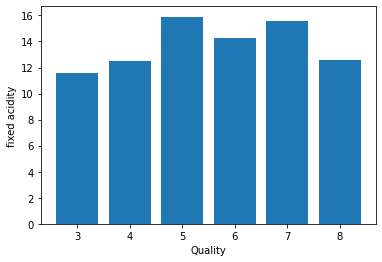

In [418]:
plt.bar(df['quality'],df['fixed acidity'])
plt.xlabel('Quality')
plt.ylabel('fixed acidity')
plt.show()

## 2. Volatile acidity VS Quality

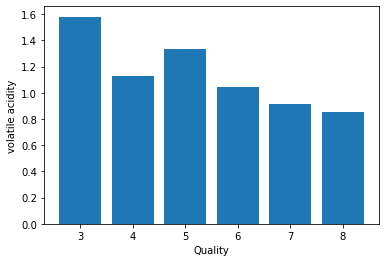

In [419]:
plt.bar(df['quality'],df['volatile acidity'])
plt.xlabel('Quality')
plt.ylabel('volatile acidity')
plt.show()

## 3. Residual sugar VS Quality

In [420]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

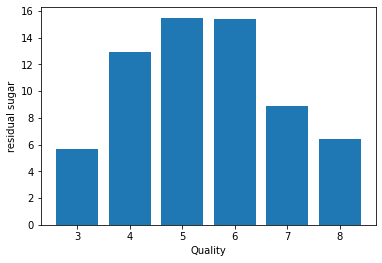

In [421]:
plt.bar(df['quality'],df['residual sugar'])
plt.xlabel('Quality')
plt.ylabel('residual sugar')
plt.show()

## 4. Chlorides VS Quality

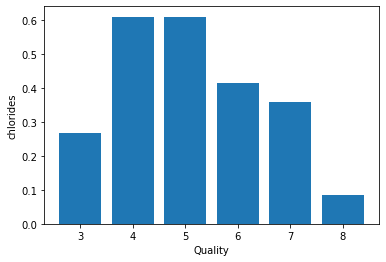

In [422]:
plt.bar(df['quality'],df['chlorides'])
plt.xlabel('Quality')
plt.ylabel('chlorides')
plt.show()

## 5. Total sulfur dioxide VS Quality

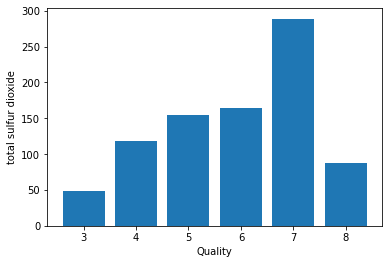

In [423]:
plt.bar(df['quality'],df['total sulfur dioxide'])
plt.xlabel('Quality')
plt.ylabel('total sulfur dioxide')
plt.show()

## 6. Alcohol VS Quality

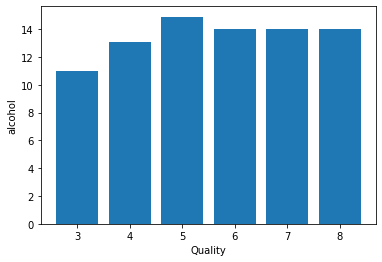

In [424]:
plt.bar(df['quality'],df['alcohol'])
plt.xlabel('Quality')
plt.ylabel('alcohol')
plt.show()

In [425]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.255124,0.667437,0.111025,0.085886,-0.140580,-0.103777,0.670195,-0.686685,0.190269,-0.061596,0.119024
volatile acidity,-0.255124,1.000000,-0.551248,-0.002449,0.055154,-0.020945,0.071701,0.023943,0.247111,-0.256948,-0.197812,-0.395214
citric acid,0.667437,-0.551248,1.000000,0.143892,0.210195,-0.048004,0.047358,0.357962,-0.550310,0.326062,0.105108,0.228057
residual sugar,0.111025,-0.002449,0.143892,1.000000,0.026656,0.160527,0.201038,0.324522,-0.083143,-0.011837,0.063281,0.013640
chlorides,0.085886,0.055154,0.210195,0.026656,1.000000,0.000749,0.045773,0.193592,-0.270893,0.394557,-0.223824,-0.130988
free sulfur dioxide,-0.140580,-0.020945,-0.048004,0.160527,0.000749,1.000000,0.667246,-0.018071,0.056631,0.054126,-0.080125,-0.050463
total sulfur dioxide,-0.103777,0.071701,0.047358,0.201038,0.045773,0.667246,1.000000,0.078141,-0.079257,0.035291,-0.217829,-0.177855
density,0.670195,0.023943,0.357962,0.324522,0.193592,-0.018071,0.078141,1.000000,-0.355617,0.146036,-0.504995,-0.184252
pH,-0.686685,0.247111,-0.550310,-0.083143,-0.270893,0.056631,-0.079257,-0.355617,1.000000,-0.214134,0.213418,-0.055245
sulphates,0.190269,-0.256948,0.326062,-0.011837,0.394557,0.054126,0.035291,0.146036,-0.214134,1.000000,0.091621,0.248835


<AxesSubplot:>

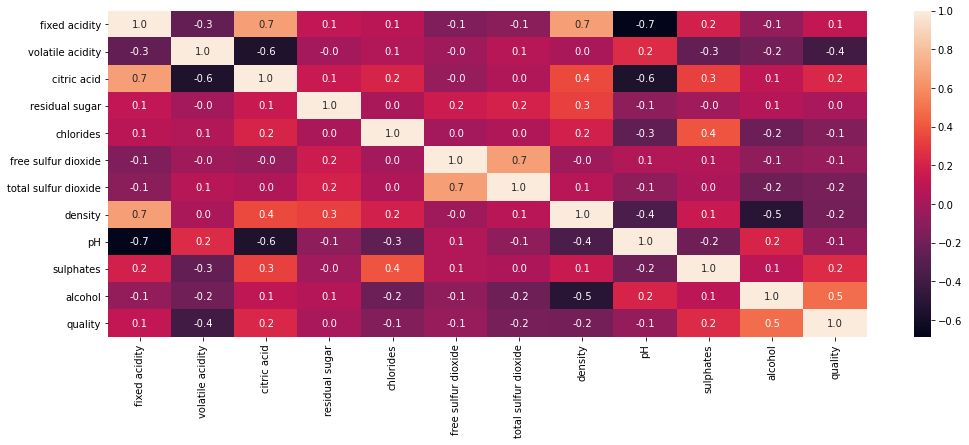

In [426]:
plt.figure(figsize=(17,6))
sns.heatmap(df.corr(),annot=True,fmt='0.1f')

#### Let's Binarize our Target Variables into 0 and 1

In [427]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3], dtype=int64)

In [428]:
df['quality']=[1 if x>=7 else 0 for x in df['quality']]

<ipython-input-428-7ca63acd0cfa>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['quality']=[1 if x>=7 else 0 for x in df['quality']]


In [429]:
df['quality'].unique()

array([0, 1], dtype=int64)

## Not Handling Imbalanced Dataset.
#### What is imbalanced dataset

In [430]:
df['quality'].value_counts()

0    1175
1     184
Name: quality, dtype: int64

C:\Users\DAMMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='quality', ylabel='count'>

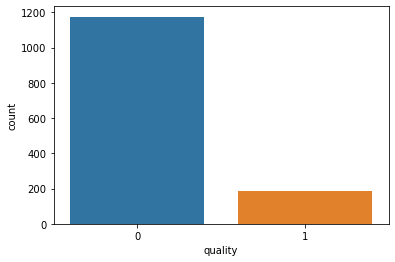

In [431]:
sns.countplot(df['quality'])

In [432]:
X = df.drop('quality',axis=1)
y=df['quality']

#### From our visualization,we can see that our data is imbalanced.Imbalanced data sets can occur when our target class has an uneven distribution of observations.If we dont handle imbalanced datasets

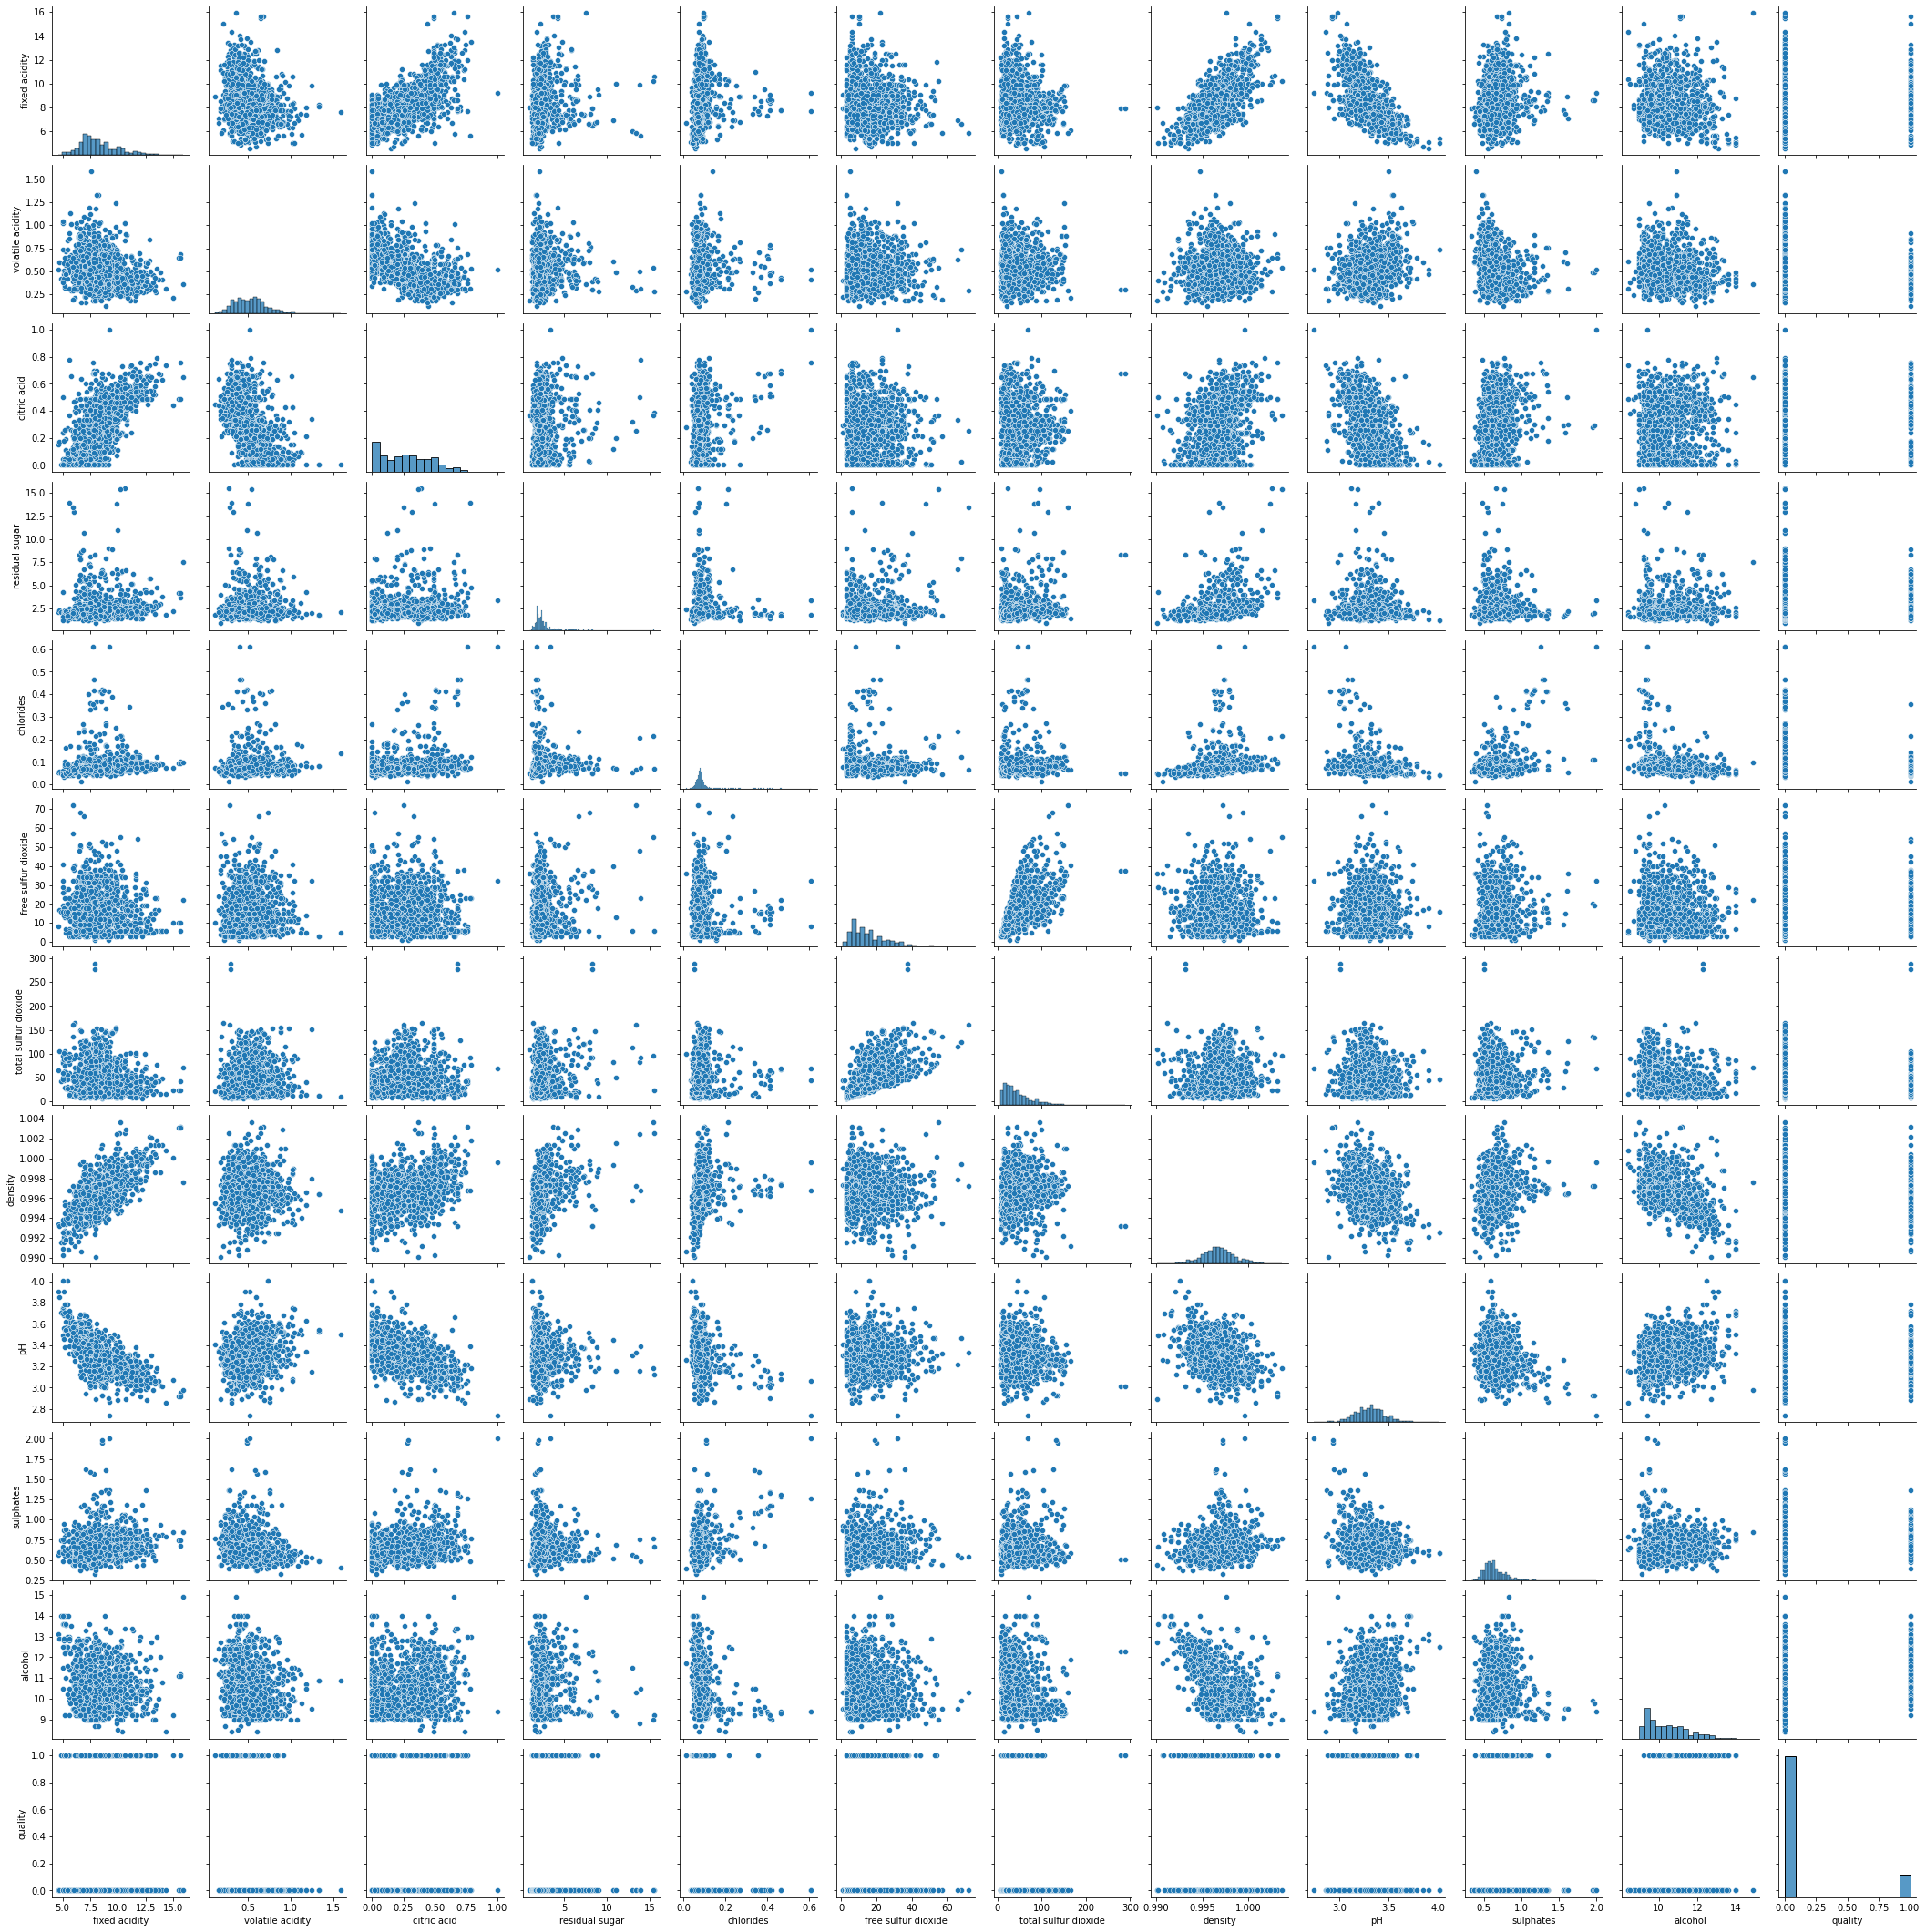

In [433]:
sns.pairplot(df)

## Handling Imbalanced Datasets
#### To handle imbalanced datasets, we can use two techniques;Oversampling and Undersampling.We can either oversample the minority class using replacement (Oversampling) OR we can also randomly variate rows from the majority class to match with minority class(Undersampling).A big disadvantage of undersampling is that we loose a lot valuable data. So we will prefer to use oversampling technique using Synthetic Minority Oversampling Technique (SMOTE).It is a common oversampling method to solve imbalanced data problems.SMOTE balances distribution by randomly increasing minority class examples by replacing them. SMOTE Synthesizes new minority instances between existing minority instances by linear interpolation.We are not generating duplicates, we only generate synthetic datasets that are slightly different from the original datasets

In [434]:
from imblearn.over_sampling import SMOTE

In [435]:
X_smo,y_smo = SMOTE().fit_resample(X,y)
y_smo.value_counts()

0    1175
1    1175
Name: quality, dtype: int64

## Store feature matrix in X and Response(Target) in vector y

## Split Dataset into Train Test Split

In [436]:
from sklearn.model_selection import train_test_split

In [437]:
X_train,X_test,y_train,y_test=train_test_split(X_smo,y_smo,test_size=0.20,random_state=42)

## Feature scaling :
### Feature Scaling allows us to put our features into the same scale. We need feature scaling for machine learning algorithms that calculate distances between data.If not,features with high value range start dominating when calculating distances.

In [438]:
from sklearn.preprocessing import StandardScaler

In [439]:
st=StandardScaler()
X_train=st.fit_transform(X_train)
X_test=st.fit_transform(X_test)

In [440]:
X_train

array([[ 0.31151031, -0.19069937,  0.96237048, ..., -0.71483405,
        -0.72423511,  0.92693882],
       [ 0.70904702,  2.38196084, -0.35213668, ...,  0.76502882,
        -0.18188844,  0.24993501],
       [ 1.15685295, -0.32015991,  0.85491784, ..., -0.61310928,
         1.10607217,  0.33746392],
       ...,
       [-0.63437075,  0.73719169, -0.29965605, ..., -0.06185404,
        -0.89026678, -0.9754697 ],
       [-0.9702252 , -0.02645113, -1.24430742, ...,  0.00705286,
        -0.3106845 , -1.15052752],
       [ 0.20526536, -0.90757746, -0.03725289, ..., -0.8887369 ,
        -0.95466481, -0.45029625]])

#### From the output above,our features are in the same scale.

## Applying Principal Component Analysis (PCA):
#### It's a dimensionality reduction method.It is used to reduce the dimensionality of large datasets by transforming a large set of variables into a smaller one so they can fit-in easily and still contains most of the information of the larger sets.Basically, PCA allows us to have a representation of our 11 columns into two column datasets.

In [441]:
from sklearn.decomposition import PCA

In [442]:
pca = PCA(n_components=0.90)

#### So, we will have to perform PCA for X_train and X_test

In [443]:
X_train=pca.fit_transform(X_train)
X_test=pca.fit_transform(X_test)

In [444]:
sum(pca.explained_variance_ratio_)

0.9222263512850957

In [445]:
pca.explained_variance_ratio_

array([0.3067601 , 0.17175115, 0.15476749, 0.10919369, 0.08216613,
       0.05350539, 0.04408241])

#### Compared to accuracy,Precision,recall and f1 scores are very low because it is an imbalanced data sets. So to get higher results of precision,recall,f1 as in accuracy,we  will need to deal with the imbalanced datasets. Now we will use SMOTE

## Logistic Regression

In [446]:
from sklearn.linear_model import LogisticRegression

In [447]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [448]:
y_pred1=log.predict(X_test)

In [449]:
from sklearn.metrics import accuracy_score

In [450]:
accuracy_score(y_test,y_pred1)

0.8

In [451]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [452]:
precision_score(y_test,y_pred1)

0.7857142857142857

In [453]:
recall_score(y_test,y_pred1)

0.8319327731092437

In [454]:
f1_score(y_test,y_pred1)

0.8081632653061225

#### OUR precision score, recall score ,and f1 scores are very low because our dataset is imbalanced.This is why we have to handle imbalanced datasets. It is very dangerous to use accuracy as a meric for imbalanced dataset.So we have to check precision,recall and f1 scores too.

## SVC

In [455]:
from sklearn import svm

In [456]:
svm = svm.SVC()

In [457]:
svm.fit(X_train,y_train)

SVC()

In [458]:
y_pred2 = svm.predict(X_test)

In [459]:
accuracy_score (y_test,y_pred2)

0.8297872340425532

In [460]:
precision_score (y_test,y_pred2)

0.8110236220472441

In [461]:
f1_score(y_test,y_pred2)

0.83739837398374

## KNeighbors Classifier

In [462]:
from sklearn.neighbors import KNeighborsClassifier

In [463]:
knn = KNeighborsClassifier()

In [464]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [465]:
y_pred3 = knn.predict(X_test)

In [466]:
accuracy_score (y_test,y_pred3)

0.8127659574468085

In [467]:
precision_score (y_test,y_pred3)

0.7840909090909091

In [468]:
recall_score(y_test,y_pred3)

0.8697478991596639

In [469]:
f1_score(y_test,y_pred3)

0.8247011952191234

## Decision Tree Classifier

## Random Forest Classifier

In [470]:
from sklearn.ensemble import RandomForestClassifier

In [471]:
rf = RandomForestClassifier()

In [472]:
rf.fit(X_train,y_train)

RandomForestClassifier()

In [473]:
y_pred5 = rf.predict(X_test)

In [474]:
accuracy_score(y_test,y_pred5)

0.7893617021276595

In [475]:
precision_score(y_test,y_pred5)

0.8527918781725888

In [476]:
f1_score(y_test,y_pred5)

0.7724137931034484

## Gradient Boosting Classifier:

In [477]:
from sklearn.ensemble import GradientBoostingClassifier

In [478]:
gb = GradientBoostingClassifier()

In [479]:
gb.fit(X_train,y_train)

GradientBoostingClassifier()

In [480]:
y_pred6 = gb.predict(X_test)

In [481]:
accuracy_score(y_test,y_pred6)

0.8063829787234043

In [482]:
precision_score(y_test,y_pred6)

0.8024691358024691

In [483]:
f1_score(y_test,y_pred6)

0.8108108108108107

In [484]:
import pandas as pd

In [485]:
final_data = pd.DataFrame({'Models':['LR','SVC','KNN','RF','GBC'],
                           'ACC':[accuracy_score(y_test,y_pred1)*100,
                                  accuracy_score(y_test,y_pred2)*100,
                                  accuracy_score(y_test,y_pred3)*100,
                                  accuracy_score(y_test,y_pred5)*100,
                                  accuracy_score(y_test,y_pred6)*100]})
                                  

In [486]:
final_data

,Models,ACC
0,LR,80.000000
1,SVC,82.978723
2,KNN,81.276596
3,RF,78.936170
4,GBC,80.638298


C:\Users\DAMMY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='ACC'>

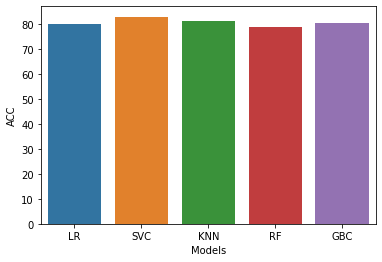

In [487]:
sns.barplot(final_data['Models'],final_data['ACC'])

In [488]:
final_data2 = pd.DataFrame({'Models':['LR','SVC','KNN','RF','GBC'],
                           'PRE':[precision_score(y_test,y_pred1)*100,
                                  precision_score(y_test,y_pred2)*100,
                                  precision_score(y_test,y_pred3)*100,
                                 
                                  precision_score(y_test,y_pred5)*100,
                                  precision_score(y_test,y_pred6)*100]})

In [489]:
final_data2

,Models,PRE
0,LR,78.571429
1,SVC,81.102362
2,KNN,78.409091
3,RF,85.279188
4,GBC,80.246914


## Save The Model

In [490]:
X = df.drop('quality',axis=1)
y=df['quality']

In [491]:
from imblearn.over_sampling import SMOTE

In [492]:
X_smo,y_smo= SMOTE().fit_resample(X,y)

In [493]:
from sklearn.preprocessing import StandardScaler
st=StandardScaler()
X=st.fit_transform(X_smo)

In [494]:
X=pca.fit_transform(X)

In [495]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_smo,y_smo)


RandomForestClassifier()

#### To save our best model which is Random Forest Classifier,we will need to import Joblib.

In [496]:
import joblib

In [497]:
joblib.dump(rf,'The_Wine_Quality_Prediction')

['The_Wine_Quality_Prediction']

In [498]:
Themodel=joblib.load('The_Wine_Quality_Prediction')
Themodel

RandomForestClassifier()

In [499]:
import pandas as pd
data=pd.DataFrame({
    'fixed acidity':7.8,
    'volatile acidity':0.76,
    'citric acid':0.04,
    'residual sugar':2.3,
    'chlorides':0.092,	
    'free sulfur dioxide':15.0,
    'total sulfur dioxide':54.0,
    'density':0.9970,	
    'pH':3.26,
    'sulphates':0.65,
    'alcohol':9.8,
},index=[0])
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.997,3.26,0.65,9.8


#### To predict,we need to perform pca and featurescaling on our above data and store it into a variable called 'testing'.After which we can now predict our 'testing' by storing it in another variable.

In [500]:
testing=pca.transform(st.transform(data))

#### Let's store testing in Q

In [501]:
Q=Themodel.predict(testing)

ValueError: X has 7 features, but DecisionTreeClassifier is expecting 11 features as input.

In [ ]:
if Q[0] == 1: 
    print("Good Quality Wine")
else:
    print("Bad Quality Wine")

#### Let's Develop a GUI for it.